# introduction to scikit learn (sklearn)

This notebook demonstrates some of the most useful functions of the Scikit-Learn library.

What we are going to cover:

0. an end-to-end sklearn workflow
1. getting data ready
2. choose right estimator/algorithm for our problems
3. fit the model/algorithm and use it to make predictions on our data
4. evaluating  a model
5. improve a model
6. save and load trained model
7. putting it all together

In [7]:
what_were_covering = [
    "0. an end-to-end sklearn workflow",
    "1. getting data ready",
    "2. choose right estimator/algorithm for our problems",
    "3. fit the model/algorithm and use it to make predictions on our data",
    "4. evaluating a model",
    "5. improve a model",
    "6. save and load trained model",
    "7. putting it all together"
]

## 0. an end-to-end sklearn workflow

In [8]:
# 1. get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("csv/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# create y (labels/ label matrix)
y = heart_disease["target"]

In [10]:
import warnings
warnings.filterwarnings("default")

In [11]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00)  [Clang 13.0.1 ]
executable: /Users/viragvegh/Desktop/sample_project/env/bin/python
   machine: macOS-12.1-x86_64-i386-64bit

Python dependencies:
          pip: 22.1.2
   setuptools: 62.3.3
      sklearn: 1.0.2
        numpy: 1.22.3
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.2
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 3.1.0

Built with OpenMP: True


/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [14]:
clf.fit(X_train, y_train);

In [15]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [16]:
# 3. make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [18]:
y_test

213    0
133    1
289    0
47     1
192    0
      ..
175    0
89     1
172    0
263    0
25     1
Name: target, Length: 61, dtype: int64

In [19]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2


In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [21]:
 # 4. evaluate the model on training data and test data
clf.score(X_train, y_train)

1.0

In [22]:
clf.score(X_test, y_test)

0.819672131147541

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [24]:
confusion_matrix(y_test, y_preds)

array([[19,  6],
       [ 5, 31]])

In [25]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [26]:
# 5. improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 80.327869%

Trying model with 20 estimators..
Model accuracy on test set: 81.967213%

Trying model with 30 estimators..
Model accuracy on test set: 78.688525%

Trying model with 40 estimators..
Model accuracy on test set: 85.245902%

Trying model with 50 estimators..
Model accuracy on test set: 83.606557%

Trying model with 60 estimators..
Model accuracy on test set: 85.245902%

Trying model with 70 estimators..
Model accuracy on test set: 83.606557%

Trying model with 80 estimators..
Model accuracy on test set: 86.885246%

Trying model with 90 estimators..
Model accuracy on test set: 85.245902%



In [27]:
# 6. save a model and load it
import pickle
#pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


loaded_model = open('random_forest_model_1.pkl', 'wb')
pickle.dump(clf, loaded_model)
loaded_model.close()

In [28]:
#loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
#loaded_model.score(X_test, y_test)

loaded_model = open('random_forest_model_1.pkl','rb')
clf = pickle.load(loaded_model)
loaded_model.close()

In [29]:
what_were_covering

['0. an end-to-end sklearn workflow',
 '1. getting data ready',
 '2. choose right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load trained model',
 '7. putting it all together']

In [30]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. getting our data ready to use

Three main things we have to do:
    1. split the data into features and labels (usually 'X' and 'y')
    2. filling (also called imputing) or disreagrding missing values
    3. converting non-num values to numerical values (also called feature encoding)

In [31]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [34]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [36]:
X.shape[0] * 0.8

242.4

In [37]:
len(heart_disease)

303

In [38]:
242 + 61

303

In [39]:
import pandas as pd

## 1.1 Make sure it is all numerical

In [40]:
car_sales = pd.read_csv("csv/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [41]:
len(car_sales)

1000

In [42]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [43]:
# split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [44]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
X.head()

In [ ]:
# turn the categories (Make column) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [45]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

In [46]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [47]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

NameError: name 'transformed_X' is not defined

In [48]:
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

## 1.2 What if there were missing values?
1. fill them with some values (also known as imputation)
2. remove the samples with missing data alltogether

In [49]:
# import car sales missing data
car_sales_missing = pd.read_csv("csv/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
# create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [52]:
# Let's try and convert our data to numbers
# turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [53]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### option 1: Fill missing data with pandas

In [54]:
# Fill the Make column 
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer (KM) column with mean
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill the doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [55]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [56]:
# remove the rows with missing price values
car_sales_missing.dropna(inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:
len(car_sales_missing)

950

In [59]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [60]:
# Let's try and convert our data to numbers
# turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: fill missing values with scikit-learn

In [61]:
car_sales_missing = pd.read_csv("csv/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
# drop the rows with no label
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [65]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [66]:
# fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values w 'missing' & numerical values w mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define column
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [68]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [69]:
# Let's try and convert our data to numbers
# turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [70]:
# we have got our data as nums and filled (no missing values)
# lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [71]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [72]:
what_were_covering

['0. an end-to-end sklearn workflow',
 '1. getting data ready',
 '2. choose right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load trained model',
 '7. putting it all together']

## 2. choosing the right estimator/algorithm for our problem


some things to note:

* sklearn refers to machine learning models, algorithms as estimators
* classification problem = predicting a category (dead or not)
    * sometimes we will see 'clf' (classifier) used as a classificaton estimator
* regression problem = predicting a number (selling price of a car)

If Im working on a ML problem and looking to use sklearn and not sure what model I shoul ise, refer to the sklearn Ml map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 picking a ML model for a regression problem

Lets use the california housing data set = https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [73]:
# get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [74]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [75]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [76]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
# import algorithm/estimator
from sklearn.linear_model import Ridge


# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100, 000s

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440125

sad accuracy score, i try another model (Ridge dint fit or score didnt fit our needs)

try ensemble (combo of smaller models to make better predictions than just a single model)

sklearns ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [78]:
# import the randomforestregressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup  random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y= housing_df["target"]

# split it inot test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.8066196804802649

In [79]:
# yeeee

## 2.2 picking a model for a classification problem

lets go to map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [80]:
heart_disease=pd.read_csv("csv/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
len(heart_disease)

303

consulting the map and its says to try `LinearSVC`

In [82]:
# import the linearscv estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate linearscv
clf=LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# evaluate the linearsvc
clf.score(X_test,y_test)

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [83]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [84]:
# import the randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate randomforestclassifier
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the randomforestclassifier
clf.score(X_test,y_test)

0.8524590163934426

tidbit:
  1. if you have structured data use ensemble models such as randomforest
  2. unstructured data: deeplearning, transferlearning

In [85]:
what_were_covering

['0. an end-to-end sklearn workflow',
 '1. getting data ready',
 '2. choose right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load trained model',
 '7. putting it all together']

## 3. fit the model/algorithm and use it to make predictions on our data

### 3.1 fitting the model to the data

* `X` = feature variables, data
* `y` = lables, targets, target variables

In [86]:
# import the randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate randomforestclassifier
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# fit the modle to the data (training the machine learning model)
clf.fit(X_train, y_train)

# evaluate the randomforestclassifier (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8688524590163934

In [87]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [88]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [89]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 make predictions useing a machine learning model
2 ways to make predictions:
 1. `predict()`
 2. `predict_proba()`

In [90]:
# use a trained model to make predictions
clf.predict(np.array([1,2,3,4,5,6])) # this doesnt work

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test

In [ ]:
clf.predict(X_test)

In [91]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [92]:
# compare preds to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [93]:
clf.score(X_test, y_test)

0.8688524590163934

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

make preds with `predict_proba()`

In [95]:
# predict_proba() returns probabilties of a classification label
clf.predict_proba(X_test[:5])

array([[0.87, 0.13],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.92, 0.08],
       [0.21, 0.79]])

In [96]:
# lets predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [97]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [98]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [99]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [100]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model instance
model = RandomForestRegressor(n_estimators=100)

# fit the model
model.fit(X_train, y_train)

# make preds
y_preds = model.predict(X_test)

In [101]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [102]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [103]:
len(y_test)

4128

In [104]:
len(y_preds)

4128

In [105]:
# compare preds to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [106]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [107]:
what_were_covering

['0. an end-to-end sklearn workflow',
 '1. getting data ready',
 '2. choose right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load trained model',
 '7. putting it all together']

## 4. evalutaing ml model

3 ways to evaluate scikit learn models/estimators:
   1. estimators built in `score()` method
   2. the `scoring` parameter
   3. problem-specific metric functions


read more: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 eavluating with the `score()` method

In [108]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X & y
X = heart_disease.drop(["target"], axis=1)
y= heart_disease["target"]

# create train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate randomforestclassifier
clf = RandomForestClassifier(n_estimators=10)

# fit model (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [109]:
# the highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [110]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [111]:
clf.score(X_test, y_test)

0.8524590163934426

lets use `score()` on our regression problem

In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["target"], axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=80)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80)

In [113]:
# the default score() evaluation metrics is r_squared for regression algorithms
# highest = 1.0 lowst = 0.0
model.score(X_test, y_test)

0.8063285573441384

In [114]:
model.score(X_test, y_test)

0.8063285573441384

In [115]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [116]:
y_test.mean()

2.0550030959302275

### 4.2 evaluating the model using the `scoring` paramaeter

In [117]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X & y
X = heart_disease.drop(["target"], axis=1)
y= heart_disease["target"]

# create train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate randomforestclassifier
clf = RandomForestClassifier(n_estimators=10)

# fit model (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [118]:
clf.score(X_test, y_test)

0.8524590163934426

In [119]:
cross_val_score(clf, X, y, cv=5)

array([0.80327869, 0.8852459 , 0.81967213, 0.75      , 0.71666667])

In [120]:
cross_val_score(clf, X, y, cv=50)

array([0.85714286, 0.85714286, 0.57142857, 1.        , 0.83333333,
       0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ,
       0.66666667, 1.        , 1.        , 0.5       , 0.83333333,
       0.83333333, 1.        , 1.        , 0.83333333, 0.83333333,
       1.        , 0.66666667, 1.        , 0.5       , 1.        ,
       0.5       , 0.83333333, 0.66666667, 0.83333333, 0.83333333,
       0.83333333, 0.66666667, 0.66666667, 0.83333333, 0.83333333,
       0.66666667, 1.        , 1.        , 0.83333333, 0.83333333,
       0.83333333, 0.33333333, 0.83333333, 0.83333333, 0.66666667,
       0.5       , 0.83333333, 0.83333333, 0.83333333, 0.83333333])

In [121]:
np.random.seed(42)

# single training and test split score
clf_single_score= clf.score(X_test, y_test)

# take mean of 5-fold cv score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8150819672131148)

In [122]:
# default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# scoing parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

### 4.2.1 classification model evaluation metrics

1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

### Accuracy

In [132]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [134]:
np.mean(cross_val_score)

0.8248087431693989

In [135]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100: .2f}%")

Heart Disease Classifier Cross-Validated Accuracy:  82.48%


**area under the receiver operating characteristic curve (AUC/ROC)** 

* area under curve (AUC)
* ROC curve

ROC curves are a composition of models true positive rate (tpr) versus a model false positive rate (fpr)

* true positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* true negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [136]:
# create X_test...etc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# make preds with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [139]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [140]:
# calculate fpr tpr and tresholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

# check the false positive
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

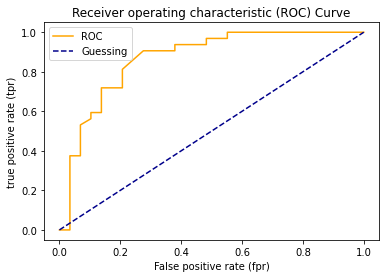

In [141]:
# create function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots a roc curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)    

In [142]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

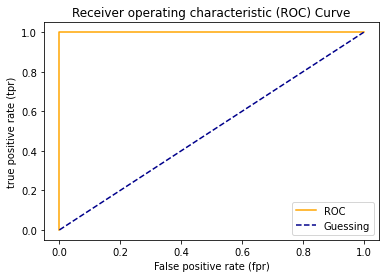

In [143]:
# plot perfect ROC curve and UC score
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [144]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

**confusion matrix**

In [147]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [148]:
# visualize the matrix
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [149]:
23 + 6 + 6 + 26

61

In [150]:
len(X_test)

61

In [152]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /Users/viragvegh/Desktop/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py39hecd8cb5_0         154 KB
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         372 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  certifi            conda-forge::certifi-2022.5.18.1-py39~ --> pkgs/main::certifi-2022.6.15-py39hecd8cb5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2022.5.1~ --> pkgs/main::ca-certificates-2022.4.26

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


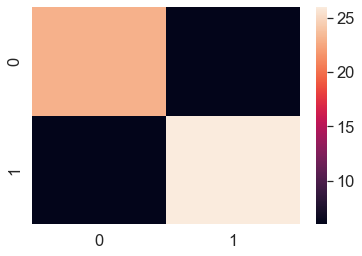

In [157]:
# make matrix more visual with seaborn heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create the confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it w seaborn
sns.heatmap(conf_mat);

**Confusion matrix**

In [158]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [159]:
pd.crosstab(y_test, y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


### creating confusion matrix using sklearn

In [160]:
import sklearn
sklearn.__version__

'1.0.2'

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:162: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


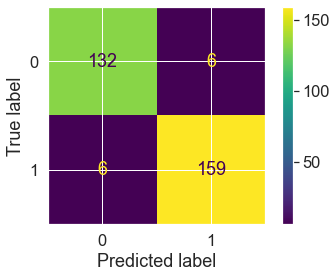

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:162: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


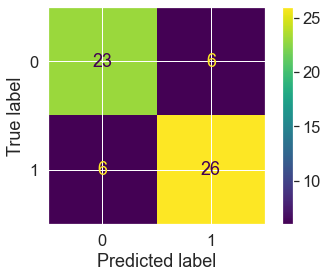

In [162]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

**Classification Reports**

collection of different evaluation methods

In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds)) # compares true labels with predictions

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [165]:
# where precision and recall became valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viragvegh/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

we are going to cover:
 1. R^2 or coefficient of determination
 2. mean absolute error (MAE)
 3. mean squared error (MSE)

In [168]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [169]:
model.score(X_test, y_test)

0.8066196804802649

In [170]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [172]:
y_test.mean()

2.0550030959302275

In [173]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [174]:
from sklearn.metrics import r2_score

# fill array w y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [175]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [176]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [177]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [178]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [182]:
df = pd.DataFrame(data={"actual values": y_test,
                    "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [185]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32657218427810186

In [179]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [180]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [186]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [201]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284,0.000284
3024,0.45800,0.754940,0.296940,0.088173,0.088173
15663,5.00001,4.928596,-0.071414,0.005100,0.005100
20484,2.18600,2.540290,0.354290,0.125521,0.125521
9814,2.78000,2.331760,-0.448240,0.200919,0.200919


In [202]:
# calculate mse by hand
squared = np.square(df["differences"])
squared.mean()

0.253407306913755

In [203]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [204]:
df_large_error.head()

,actual values,predicted values,differences,squared differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284,16.000000
3024,0.45800,0.754940,0.296940,0.088173,0.088173
15663,5.00001,4.928596,-0.071414,0.005100,0.005100
20484,2.18600,2.540290,0.354290,0.125521,0.125521
9814,2.78000,2.331760,-0.448240,0.200919,0.200919


In [205]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2572832072079409

In [206]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284,16.000000
3024,20.00000,20.000000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255,0.170255
16623,2.66800,1.947760,-0.720240,0.518746,0.518746
18086,5.00001,4.836378,-0.163632,0.026775,0.026775
2144,0.72300,0.717820,-0.005180,0.000027,0.000027


### 4.2.3 Using the `scoring` parameter

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [209]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric isused (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [210]:
# cross validated-accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [211]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [212]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [215]:
# cross-validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [218]:
# cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [222]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [223]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` paramter being used for a regression problem...

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [227]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [228]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [230]:
# MSE
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.461228671470042

In [232]:
cv_mse

array([-0.51324679, -0.32925916, -0.54118007])

In [231]:
# mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4843843314777132

In [233]:
cv_mae

array([-0.52205104, -0.4256331 , -0.50546886])

### 4.3 using different evalutaion metrics as sklearn functions

the 3rd way to evaluate sklearn ml models/estimators is to using the `sklearn.metrics`

In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make predictions
y_preds = clf.predict(X_test)

# evaluate the model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.245902%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [244]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


In [245]:
what_were_covering

['0. an end-to-end sklearn workflow',
 '1. getting data ready',
 '2. choose right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load trained model',
 '7. putting it all together']

## 5. Improving a model

first predictions = baseline predictions
first model = baseline model

from data perspective:
* could we collect more data? (more data the better)
* could we improve our data?

from a model perspective:
* is there a better model we could use?
* could we improve the current model?

Params vs hyperparams:
* parameters = model finds these patterns in data
* hyperparameter = settings on a model you can adjust to improve its ability to find patterns

Three ways to ajust hyperparameters:
1. by hand
2. randomly w RandomSearchCV
3. exhaustively with GridSearchCV

In [250]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparams by hand

Ltes make 3 sets: training, validation and test

In [251]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:
    
    * `max_depth`
    * `max_features`
    * `min_samples_leaf`
    * `min_samples_fit`
    * `n_estimators`

In [267]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a  classifiaction.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100: 2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall: .2f}")
    print(f"F1 score: {f1: .2f}")
    
    return metric_dict

In [268]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split data: train & validation & test set
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:  82.222222%
Precision:  0.81
Recall:  0.88
F1 score:  0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [257]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [303]:
np.random.seed(42)

# creating a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# make predictions with different hyperparams
y_preds_2 = clf_2.predict(X_valid)

# evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc:  91.111111%
Precision:  0.92
Recall:  0.92
F1 score:  0.92


### 5.2 hyperparameter tuning with RandomizedSearchCV

In [289]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 2000],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # num of models to try
                           cv=5,
                           verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [290]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [291]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:  81.967213%
Precision:  0.76
Recall:  0.89
F1 score:  0.82


### 5.3 hyperparameter tuning with GridSearchCV

In [292]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [293]:
6 * 5 * 2 * 3 * 3 * 5 # uff too much computing

2700

In [294]:
grid_2 = {'n_estimators': [10, 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [295]:
3*1*2*1*2*5

60

In [296]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)
                          
                        

# fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_est

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

In [297]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Let's compare our different models metrics

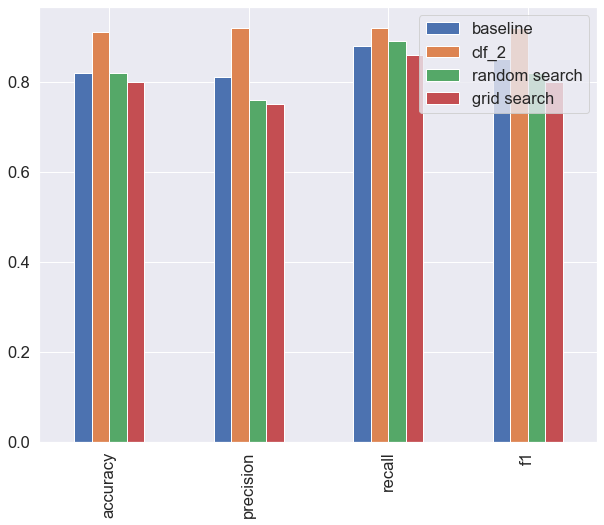

In [304]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. saving and loading trained machine learning models

Two ways to save and load machine learning models:
 1. with python's `pickle` module
 2. with the `joblib` module

### pickle

In [336]:
import pickle

# save existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

/var/folders/h5/hk6mn15x2_93hrg_4w7lcvpm0000gn/T/ipykernel_92663/401752054.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pkl'>
  pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))


In [337]:
# make some predictions
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

/var/folders/h5/hk6mn15x2_93hrg_4w7lcvpm0000gn/T/ipykernel_92663/374663583.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model_1.pkl'>
  loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))


In [338]:
# make preds
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc:  80.327869%
Precision:  0.75
Recall:  0.86
F1 score:  0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

**joblib**

In [339]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [342]:
# import saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [343]:
# make preds
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc:  80.327869%
Precision:  0.75
Recall:  0.86
F1 score:  0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [344]:
what_were_covering

['0. an end-to-end sklearn workflow',
 '1. getting data ready',
 '2. choose right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load trained model',
 '7. putting it all together']

## 7. putting it all together

In [345]:
data = pd.read_csv("csv/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [346]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [347]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell):
1. fill misiing data
2. convert data to numbers
3. build model on the data

In [350]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels
data = pd.read_csv("csv/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# setup the preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

# split the data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875